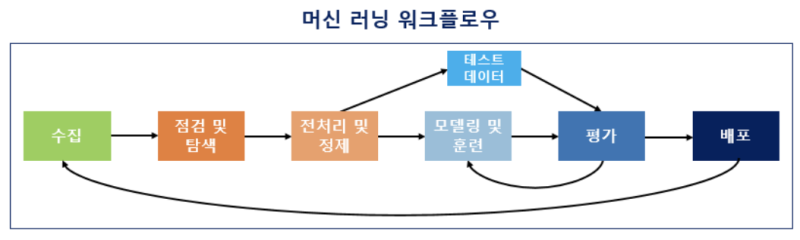

In [ ]:
import matplotlib.tri._triangulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. 데이터셋을 가져오기(수집)

In [ ]:
import os
HOME = os.getcwd()
train_csv = os.path.join(HOME, 'data\\titanic\\train.csv')

# train.csv를 읽어오기
train_df = pd.read_csv(train_csv)
train_df.head()

In [ ]:
train_df.info()

#### 2. 탐색적 데이터 분석(EDA)

In [ ]:
# 생존 여부의 시각화(생각해볼 포인트:어떤 그래프를 그리는 것이 좋을까?)
# 1. bar or barh graph [0]

# 1행 2열로 그래프를 그리려면... 가로 길이 12, 세로 길이 6
f, ax = plt.subplots(1,2,figsize=(12,6))

train_df['Survived'].value_counts().plot(kind='bar',ax=ax[0])
ax[0].set_title('Survived bar graph')
ax[0].set_ylabel('count(people)')

# 2. pie chart [1]
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',figsize=(4,4), ax=ax[1])
ax[1].set_title('Survived pie chart')
ax[1].set_ylabel('count(%)')
plt.show()

In [ ]:
# 생존 여부 분포 시각화
f,ax=plt.subplots(1,2,figsize=(5,2))

# seaborn 최신 버전에서는 x 파라미터를 명시적으로 지정해야 함
sns.countplot(x='Survived', data=train_df, ax=ax[0])
ax[0].set_title('Survived')

train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                             autopct='%1.2f%%',ax=ax[1])
ax[1].set_title('Survived')
ax[1].set_ylabel('')

plt.show()

In [ ]:
# Age의 통계치를 확인  minMax(0.42, 80) -> bins 20으로 설정하면
train_df['Age'].describe()

In [ ]:
# 나이 분포(Histogram)
# 나이 전체를 몇개로 나눌지 결정 -> bins
train_df['Age'].hist(bins=20, figsize=(10, 5))
plt.show()

In [ ]:
# 선실 등급별 평균 생존율,평균 나이, 평균 요금, 가족(Sibsp, Parch)수
train_df.groupby('Pclass').agg({'Survived':'mean', 'Age':'mean', 'Fare':'mean', 'SibSp':'mean', 'Parch':'mean'})


In [ ]:
train_df.head()

In [ ]:
train_df.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace=True)

In [ ]:
train_df.head()

In [ ]:
# train_df['Embarked']의 결측치를 most_frequent로 대체
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [ ]:
# 'Sex'와 'Embarked'를 label encoder를 사용하여 변환
from sklearn.preprocessing import LabelEncoder

# 1. 레이블 인코드 생성
label_encoder = LabelEncoder()

# 2. 'Sex'와 'Embarked'를 레이블 인코딩
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])

In [ ]:
train_df.head()

In [ ]:
# 상관 관계(벡터의 상관관계) 
# pandas에서 corr()를 seaborn의 heatmap으로 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(train_df.drop('Name', axis=1).corr(), annot=True, cmap='coolwarm',square=True, linecolor="white", linewidths=0.01)
plt.show()

In [ ]:
# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(train_df.corr(numeric_only=True), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.coolwarm, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [ ]:
# train['Age']에 대한 결측치 평균값으로 채우기

# 결과를 다시 해당 컬럼에 대입하는 방식입니다.
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

In [ ]:
# Kaggle 노트북을 보면 나이를 숫자로 그대로 사용하지 않고, 구간을 정해서 사용
# 0~3세, 4~7세, 8~15세, 16~30세, 31~60세, 61~81세
train_df['Age_cat'] = pd.cut(train_df['Age'], bins=[0,3,7,15,30,60,81], labels=['baby', 'children', 'teenage', 'young', 'adult', 'elder'])
train_df.head()

In [ ]:
# 'Age_cat'를 기준으로 groupby
train_df.groupby(['Age_cat'], observed=True)['Survived'].mean()

In [ ]:
# 등급, 나이대, 성별에 따른 생존률 시각화
plt.figure(figsize=[14,4])
plt.subplot(131)
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.subplot(132)
sns.barplot(x='Age_cat', y='Survived', data=train_df)
plt.subplot(133)
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

In [ ]:
# 성별에 따른 생존 여부 시각화
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='Sex', data=train_df, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot(x='Sex', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#### 귀족들의 생존율만 다시 조사해보기

In [ ]:
train_df.head(10)

In [ ]:
# 0행의 이름을 가져와서 콤바로 분리, 점으로 분리, 공백제거
train_df['Name'][0].split(',')[1].split('.')[0].strip()

In [ ]:
# train_df[Name'] 컬럼에서 0번 행의 이름이 Braund, Mr.Owen Harris인데

In [ ]:
# 위의 이름을 분리하는 (신분만 취하는) 코드를 사용하여 람다 함수 생성
# 그 사람의 신분을 나타내는 것을 title
conversion_rare = lambda x: x.split(',')[1].split('.')[0].strip()
train_df['Title'] = train_df['Name'].map(conversion_rare)

# 신분에서 중복되는 것을 하나로 합치고, unique 한 목록만 추력
titles = train_df['Title'].unique()
print(titles)

In [ ]:
# ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
# 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
# 위의 호칭중에 중복된 것들을 제거한다.

train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

Rare = ['Lady','the Countess','Countess','Capt', 'Master',
        'Col','Don','Dr','Major','Rev','Sir','Jonkheer', 'Dona']

for each in Rare:
    train_df['Title'] = train_df['Title'].replace(each, 'Rare')
    
train_df['Title'].unique()

In [ ]:
train_df.head()

#### 3. 전처리(Preprocessing)

In [ ]:
train_df.isnull().sum()

In [ ]:
# train_df에서 get_dummies를 사용하여 ['Pclass', 'Sex', 'Embarkded', Title', 'Age_cat']를 one-hoy encoding한다.
train_df2 = pd.get_dummies(train_df, columns = ['Pclass', 'Sex', 'Embarked', 'Age_cat', 'Title'])
train_df2.head()

In [ ]:
print(train_df2.columns.tolist())

In [ ]:
train_df2 = train_df2.drop(columns = 'Name')
train_df2.columns.tolist()

In [ ]:
# 상관관계 히트맵 시각화
plt.figure(figsize=(15, 15))
sns.heatmap(train_df2.corr(numeric_only=True), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.coolwarm, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [ ]:
# survived와 상관계수의 값이 +-0.2 이상인 컬럼만 추출
colList = train_df2.corr(numeric_only = True)['Survived'].abs().sort_values(ascending=False)
train_df2.loc[:,colList > 0.2]

#### 4. 모델링(학습)

In [ ]:
# 데이터 분할 (train/test)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_df2.drop('Survived', axis=1), train_df2['Survived'], test_size=0.2, stratify=train_df2['Survived'], random_state=42)

In [ ]:
x_train.shape, x_test.shape

In [ ]:
y_train.value_counts(), y_test.value_counts()

#### 생존자 예측을 위해 Decision Tree 모델링을 사용

In [ ]:
# DecisionTreeClassifier를 사용
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. 모델 생성
model = DecisionTreeClassifier()

# 2. 모델 학습
model.fit(x_train, y_train)

# 3. 모델 예측
y_pred = model.predict(x_test)

# 4. 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)



#### 5. 평가(Evaluation)

#### 6. 배포(Deployment)
* gradio나 streamlit을 사용하여 배포를 합니다.
* 모델을 테스트 하기 위해 환경 제공